In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

load data

In [70]:
rift_data = pd.read_csv('../data/outputs/expertise_rift_data.csv')
arc_data = pd.read_csv('../data/outputs/expertise_arc_data.csv')
boundless_data = pd.read_csv('../data/outputs/expertise_boundless_data.csv')

input the era we are interested in looking at

In [76]:
data = arc_data.query('(cause_of_death != "disconnect") and (age > 3)')
data.head()

,release,timestamp,hash,playerID,age,cause_of_death,n_lives,cumulative_game_time
0,194.0,1548807206,a51edcb77a3900d53adc61d394876c5ca7417486,2.0,57.49,hunger,1,1
9,194.0,1548814368,ae09be18ed30a4121b92f540bc20e70a010e8791,7.0,16.03,hunger,7,1
10,194.0,1548814376,b3a2c99deced24ac11f6b8b10ba49066ca96606d,23.0,14.97,hunger,151,3
12,194.0,1548814408,c5c94e5501424d0567c90730f5e2e6ad482a440f,21.0,15.57,hunger,1886,3
18,194.0,1548814487,c994a513c1d1d9affd726c863b341da86c59b903,26.0,16.55,hunger,3335,2


In [78]:
sns.set(color_codes=True)

age vs. total number of lives. Separated by hash

In [77]:
age = data.groupby("hash")['age'].mean().to_frame().reset_index()
lives = data.groupby("hash")['n_lives'].mean().to_frame().reset_index()
newdf = pd.merge(age, lives)
newdf.head()

,hash,age,n_lives
0,00006debdd4d630a4a5aa395135a70a69e0db01e,7.846667,3
1,0001394319e5e63bb74219fef647e9ff24507a21,16.007500,4
2,00030d8a6d24ff9a416642f51ef68408cd846ec8,12.935000,3
3,000565c609e636be857e04c7504f2b2545f287bc,28.865833,13
4,0005eb266ff93d00bb6072d9c07f3a47d4864219,17.182500,9


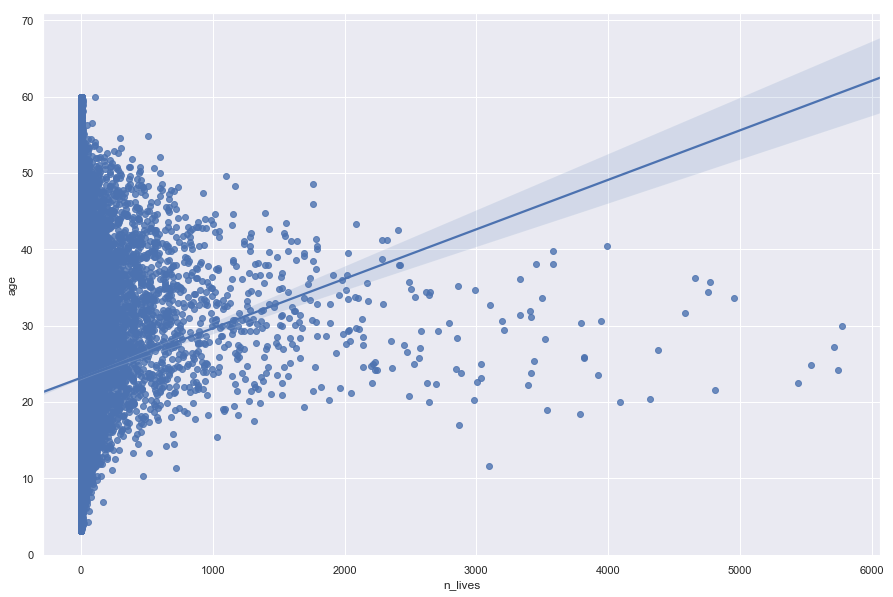

In [79]:
plt.figure(figsize=(15,10))
cgt = data.groupby("age")['cumulative_game_time'].mean().to_frame().reset_index()
sns.regplot(x = 'n_lives', y = 'age', data = newdf)
plt.show()

cumulative_game_time vs. age. Grouped by age

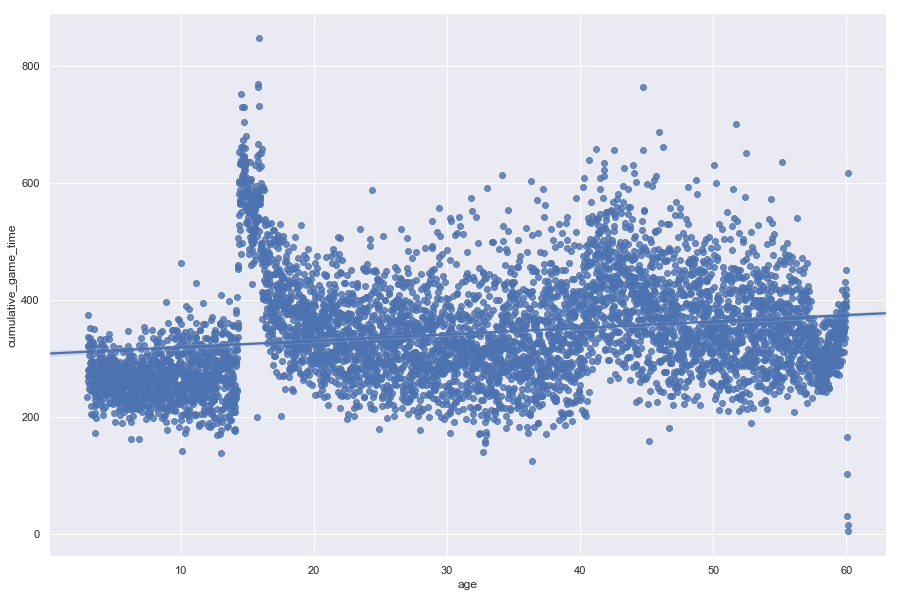

In [80]:
plt.figure(figsize=(15,10))
cgt = data.groupby("age")['cumulative_game_time'].mean().to_frame().reset_index()
sns.regplot(x = 'age', y = 'cumulative_game_time', data = cgt)
plt.show()